# Importacion de Librerias


In [1]:
import cv2                                     #OpenCV 
import numpy as np                             #Numpy
import matplotlib.pyplot as plt                #Matplotlib
from sklearn.externals import joblib           #Sklearn SVM 
from skimage.feature import hog                #Sklearn HOG

# Etapa 1

## Pre-Procesamiento 

In [2]:
img = cv2.imread("./Adquisicion/prueba6.jpg",0)

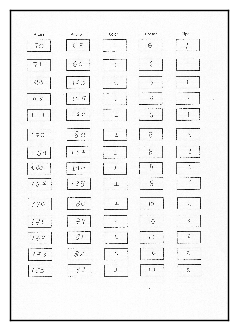

In [12]:
plt.imshow(img,'gray')
plt.xticks([])
plt.yticks([])
plt.show()

## Binarizacion

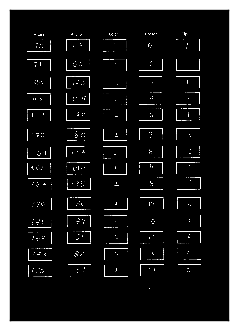

In [8]:
blur = cv2.GaussianBlur(img,(5,5),0)
ret,img2 = cv2.threshold(blur,127,255,cv2.THRESH_BINARY_INV) 
plt.imshow(img2,'gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Transformacion morfologicas

## Filtro Cierre

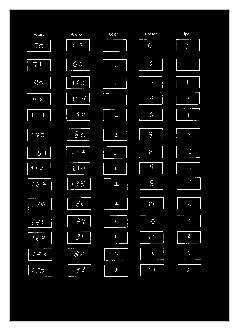

In [10]:
k1 = np.ones((10,10),np.uint8)
k2 = np.ones((10,10),np.uint8)
closing = cv2.morphologyEx(img2,cv2.MORPH_CLOSE,k1) #Filtro Cierre
plt.imshow(closing,'gray')
plt.xticks([])
plt.yticks([])
plt.show()

 ## Filtro Dilatacion

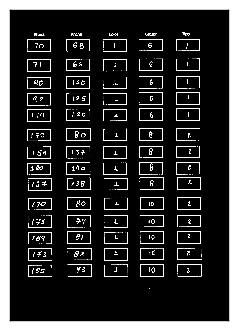

In [11]:
dilation = cv2.dilate(closing,k2,1)                  #Filtro Dilatacion
plt.imshow(dilation,'gray')
plt.xticks([])
plt.yticks([])
plt.show()

# Etapa 2 

## Extraccion de cajas  

In [16]:
imag3=dilation
im2, contours, hierarchy = cv2.findContours(imag3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[:]#Guardar coordenas de los contornos encontrados
idx = 0 
idy = 0
for cnt in contours:                
    idx += 1 
    x,y,w,h = cv2.boundingRect(cnt)    
    x=x       #izquierda
    y=y       #arriba
    w=w       #derecha
    h=h       #bajo  
    roi2=img[y:y+h,x:x+w]  
    y1=y
    y2=y+h
    x1=x
    x2=x+w
    if (roi2.shape )>(200,430) and (roi2.shape )<(240,490):       
        idy = idy +1
        cv2.imwrite("./Segmentacion/caja(%d).jpg"%(idy), roi2)         



# Etapa 3 

## Support Vector Machine
